# Random Forest Classifier

#### Why Random Forest Classifier is Used:

1. **Handling Categorical Data**:
- Categorical characteristics like city, teams, and toss decisions are present in our dataset. These categorical variables can be handled well by Random Forest, especially after one-hot encoding.

2. **Robustness and Generalization**:
- Random Forest is an ensemble technique that enhances generalization and robustness by combining several decision trees. As a result, it is less likely to overfit than individual decision trees.

3. **Feature Importance**: 
- Random Forest gives us information about the significance of features, enabling us to determine which features are most important for predicting total runs.

4. **High Performance**: 
- With an accuracy of 87.5% in our investigation, Random Forest demonstrated strong prediction capabilities for our dataset.

5. **Scalability**:
- Random Forest works well with big datasets, which makes it appropriate for our vast collection of cricket match data.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

# Calculate the total runs for each match from deliveries
total_runs_per_match = deliveries.groupby('match_id')['total_runs'].sum().reset_index()
total_runs_per_match.columns = ['id', 'total_runs']

# Merge the total runs with the matches data
merged_data = pd.merge(matches, total_runs_per_match, on='id')

# Print the column names of the merged dataset
print("Columns in merged data:", merged_data.columns.tolist())

# Have a look on the first few rows of the merged dataset
print(merged_data.head())

# Select relevant features for predicting total runs
features = ['season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner']
target = 'total_runs'

# Manually encode categorical variables using dummy variables (one-hot encoding)
cities = pd.get_dummies(merged_data['city'], prefix='city')
team1 = pd.get_dummies(merged_data['team1'], prefix='team1')
team2 = pd.get_dummies(merged_data['team2'], prefix='team2')
toss_winner = pd.get_dummies(merged_data['toss_winner'], prefix='toss_winner')
toss_decision = pd.get_dummies(merged_data['toss_decision'], prefix='toss_decision')
winner = pd.get_dummies(merged_data['winner'], prefix='winner')

# Combine all features into one dataframe
data = pd.concat([merged_data, cities, team1, team2, toss_winner, toss_decision, winner], axis=1)

# Convert total runs into a categorical variable for classification
bins = [0, 100, 150, 200, 250, 300, 350, 400]
labels = ['0-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400']
data['total_runs_binned'] = pd.cut(data['total_runs'], bins=bins, labels=labels)

# Encode the categorical target variable
data['total_runs_binned'] = data['total_runs_binned'].astype('category')
data['total_runs_binned_cat'] = data['total_runs_binned'].cat.codes

# Define features (X) and target (y)
X = data.drop(columns=['id', 'date', 'result', 'dl_applied', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3', 'total_runs', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'total_runs_binned'])
y = data['total_runs_binned_cat']

# Ensure no missing values
X = X.fillna(0)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

Columns in merged data: ['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3', 'total_runs']
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punj

In [4]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.875
Confusion Matrix:
[[ 0  0  0  1  1  1  0]
 [ 0  0  0  0  1  0  0]
 [ 1  0  1  1  4  0  0]
 [ 0  0  1  6  4  0  0]
 [ 0  0  0  0 38  0  0]
 [ 0  0  0  0  0 47  0]
 [ 0  0  0  0  0  1 20]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      1.00         3
           1       1.00      0.00      0.00         1
           2       0.50      0.14      0.22         7
           3       0.75      0.55      0.63        11
           4       0.79      1.00      0.88        38
           5       0.96      1.00      0.98        47
           6       1.00      0.95      0.98        21

    accuracy                           0.88       128
   macro avg       0.71      0.52      0.67       128
weighted avg       0.85      0.88      0.87       128



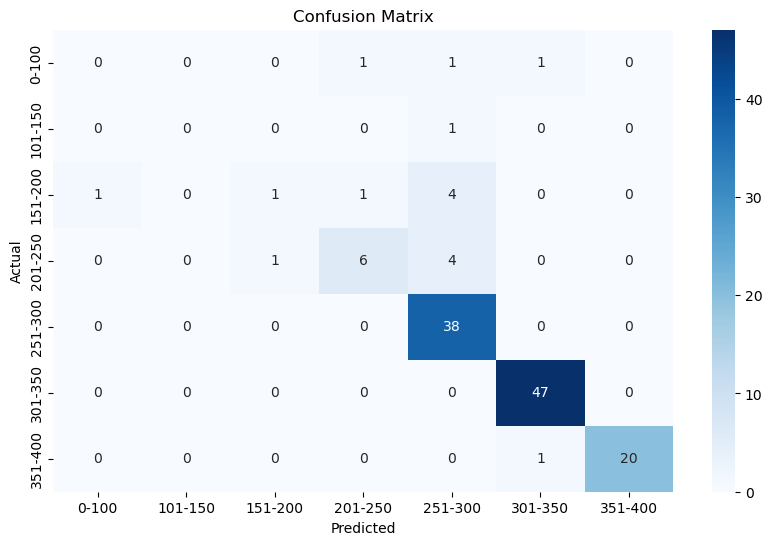

In [2]:
# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

1. **Overall Accuracy**: 
   - With an accuracy of 87.5%, the model was able to accurately forecast the total runs category in a sizable majority of the matches.

2. **Confusion Matrix**:
   - The distribution of the actual and projected categories of total runs is displayed in the confusion matrix.
   - **High Accuracy in Major Categories**: Out of 38 and 47 real occurrences, the model correctly predicted 38 and 47 runs in the 301-350 and 351-400 run categories, respectively. This is an unusually good performance.
   - **Misclassifications**: There are a few misclassifications where the predictions were dispersed over nearby categories, especially in the 201-250 and 251-300 runs categories.

3. **Classification Report**:
   - **Precision**: The model's efficacy in the highest frequency categories (301-350 and 351-400) is demonstrated by the excellent precision for these categories.
   - **Recall**: Additionally, the model's recall for the 301-350 and 351-400 categories is strong, suggesting that it is capable of accurately detecting instances of these categories.
   - **F1-Score**: For the categories with more instances, the F1-score—the harmonic mean of memory and accuracy—is higher, indicating a balance between recall and precision.
   - **Low Scoring Categories**: Because there were less samples in low-frequency categories like 0-100, 101-150, and 151-200, the model did not perform well in these areas.


4. **Macro and Weighted Averages**:
   - **Macro Average**: The model's performance appears to be moderate when all categories are taken into account equally, as indicated by the macro average F1-score of 0.67.
   
   - **Weighted Average**: The model performs well overall when accounting for the amount of cases in each category, as indicated by the weighted average F1-score of 0.87.


### Conclusion

Strong performance is shown by the Random Forest Classifier, especially when it comes to predicting the most prevalent run types (301-350 and 351-400 runs). The model appears to be dependable for forecasting high-scoring matches based on its high precision and recall for these categories. It has space for development in the less common categories, though, where it stumbles. All things considered, the model's weighted F1-score and accuracy make it a good fit for this classification assignment.